In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from PyEyeSim import EyeData

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
Path='C:/Users/nickp/Documents/Courses/P1&P2/EyeMovementDat/'
FilePath=Path+'merged.csv'
FixData=pd.read_csv(FilePath, sep=',',header=0, dtype={'subject': str})
print(np.shape(FixData))

(265703, 12)


In [5]:
# delete every row where the repetition is not 0 and record_number is not 0
FixData=FixData[FixData['repetition']==0]
FixData=FixData[FixData['record_number']==0]
print(np.shape(FixData))

(258562, 12)


dataset size:  (258562, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 200 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  200 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels
Data for  200 observers and  36  stimuli.
Mean fixation number:  36.89  +/-  9.95
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  7028
Mean X location:  476.5  +/-  92.1  pixels
Mean Y location:  465.2  +/-  65.3  pixels
Mean saccade  amplitude:  79.9  +/-  19.2  pixels
Mean scanpath  length:  2482.0  +/-  566.8  pixels


(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30, 8881, 8882, 8883,
        8884, 8885, 8886], dtype=int64),
 array(['21418', '21422', '21463', '21468', '21469', '21474', '21480',
        '21498', '21513', '21522', '21526', '21531', '21568', '21629',
        '21630', '21636', '21641', '21653', '21658', '21667', '21680',
        '21683', '21685', '21699', '21706', '21735', '21774', '21811',
        '21819', '21820', '21862', '21878', '21889', '21927', '21930',
        '21939', '21946', '22018', '22036', '22108', '22109', '22127',
        '22129', '22138', '22149', '22168', '22174', '22180', '22181',
        '22186', '22204', '22214', '22219', '22228', '22234', '22239',
        '22242', '22261', '22271', '22279', '22291', '22322', '22324',
        '22327', '22341', '22346', '22376', '22378', '22383', '22388',
        '22394', '22410', '

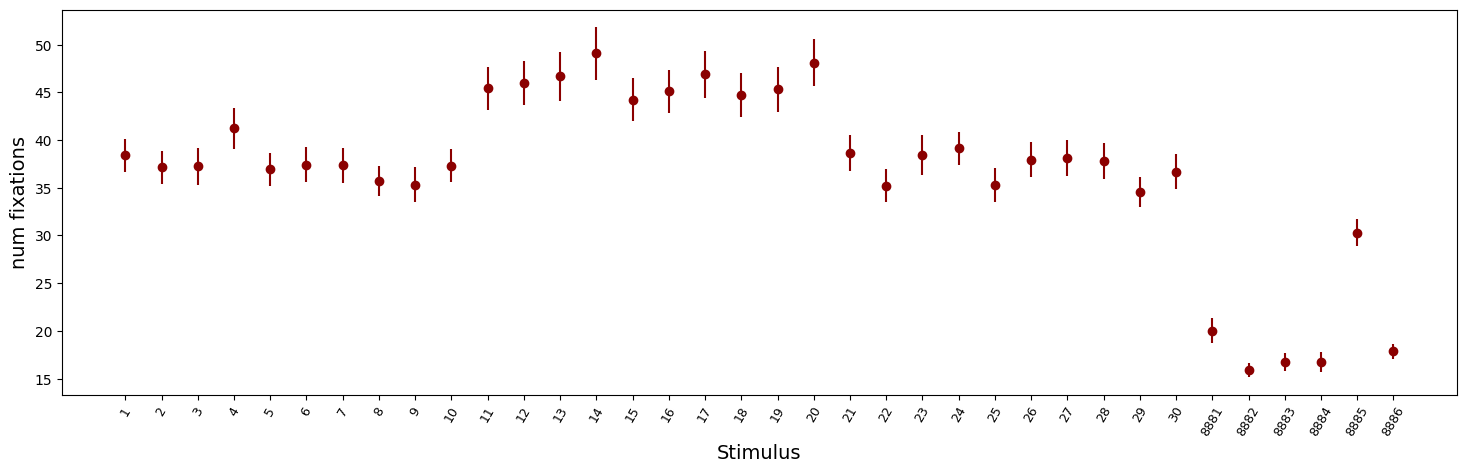

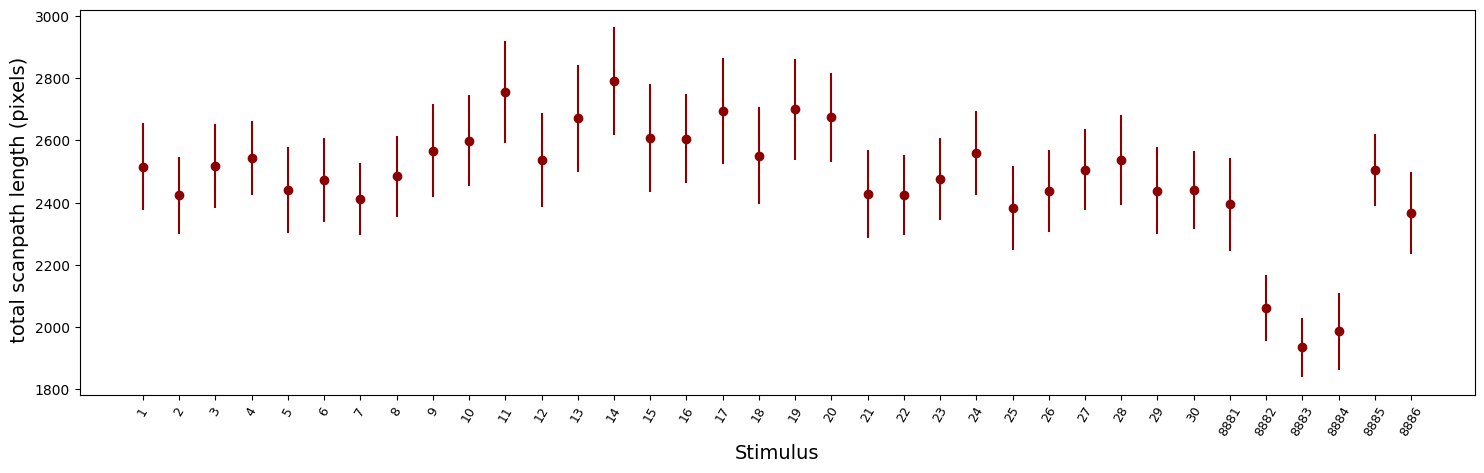

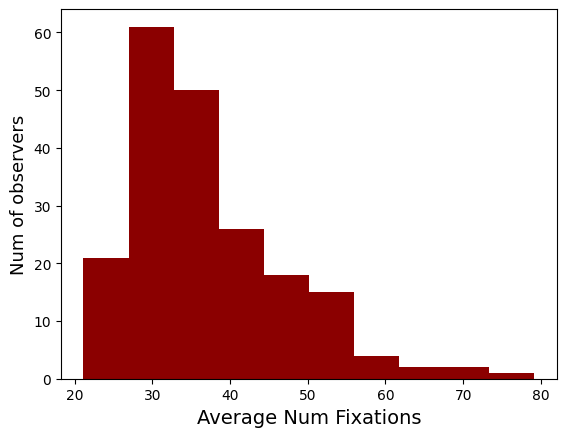

In [6]:

sizeX,sizeY=1280, 960


DyslexiaDat=EyeData(FixData,sizeX,sizeY)
DyslexiaDat.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')
DyslexiaDat.RunDescriptiveFix(Visual=1)

---

In [182]:
complete_data = []
missing_data = {}
subject_with_missing_data = {}
set_subj = set()
for i in range(0,36):
    FixGr=np.array(DyslexiaDat.nfix[0:117,i])
    if not np.isnan(FixGr).any():
        complete_data.append(i)
    if np.isnan(FixGr).any():
        missing_data[i] = np.isnan(FixGr).sum()
        for x in np.where(np.isnan(FixGr))[0]:
            subject_with_missing_data[x] = +1
            set_subj.add(x)


print(f'{len(complete_data)} Stimuli with complete data: {complete_data}')
print(f'{len(missing_data)} Stimuli with Missing data: {missing_data}')
print(f'Max subject that have not seen the stimulus: {max(missing_data.values())}')
print(f'{len(subject_with_missing_data)} Subjects with missing data: {subject_with_missing_data}')

10 Stimuli with complete data: [0, 3, 4, 5, 7, 15, 18, 28, 31, 32]
26 Stimuli with Missing data: {1: 1, 2: 1, 6: 1, 8: 1, 9: 1, 10: 3, 11: 3, 12: 2, 13: 3, 14: 1, 16: 2, 17: 1, 19: 2, 20: 1, 21: 1, 22: 1, 23: 1, 24: 2, 25: 1, 26: 2, 27: 1, 29: 1, 30: 1, 33: 1, 34: 2, 35: 3}
Max subject that have not seen the stimulus: 3
29 Subjects with missing data: {115: 1, 43: 1, 53: 1, 10: 1, 15: 1, 17: 1, 91: 1, 94: 1, 116: 1, 32: 1, 83: 1, 20: 1, 41: 1, 96: 1, 55: 1, 44: 1, 82: 1, 14: 1, 2: 1, 66: 1, 73: 1, 58: 1, 25: 1, 99: 1, 64: 1, 8: 1, 27: 1, 76: 1, 80: 1}


Here we check for the Munich subjects, the amount of stimuli and subject that have some empty data. In other words, we check for every subjects wich and how many stimuli they have not seen (or have been delete because with repetition > 0 and record_number > 0)

Over 36 stimuli 26 have at least one subject that have not seen them.

Over 117 subject only 20 have not seen at least one stimuli (actually every of these subjects have got a proble with one stimulus).

We can consider to remove this 20 subject from the dataset (that correspond to around 17% of the total), or consider to use only the 10 stimui that have full data for every subject, or every time that we randomly select a combination of stimulus/subject check if the subject has seen the stimulus and if not substitute it with another one.

---

In [8]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [8]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0
WhichCN = WhichCN.astype(int)
WhichCN

array([1, 4, 4, 3, 3, 3, 2, 4, 4, 4, 2, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 4,
       3, 1, 1, 1, 4, 1, 4, 4, 3, 4, 0, 1, 1, 4, 4, 2, 1, 1, 2, 1, 4, 1,
       2, 3, 1, 2, 4, 1, 4, 3, 2, 2, 2, 1, 4, 1, 1, 1, 2, 3, 4, 4, 1, 2,
       4, 2, 1, 2, 1, 1, 1, 1, 3, 3, 2, 4, 2, 4, 1, 4, 2, 1, 2, 3, 3, 2,
       4, 1, 1, 3, 3, 1, 0, 1, 4, 4, 2, 0, 4, 4, 4, 3, 4, 2, 2, 1, 4, 4,
       4, 4, 4, 4, 3, 1, 1, 3, 4, 2, 3, 3, 4, 3, 4, 4, 4, 3, 4, 4, 1, 2,
       1, 3, 1, 3, 3, 3, 3, 4, 3, 3, 2, 4, 4, 3, 2, 4, 1, 1, 0, 4, 1, 4,
       1, 4, 4, 4, 4, 3, 1, 1, 4, 3, 3, 3, 1, 2, 4, 2, 3, 1, 4, 4, 3, 3,
       3, 2, 4, 4, 4, 4, 1, 3, 0, 0, 3, 2, 4, 4, 4, 4, 4, 1, 1, 3, 1, 4,
       4, 0])

In [9]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC

array([0, 3, 3, 2, 2, 2, 1, 3, 3, 3, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 3,
       2, 0, 0, 0, 3, 0, 3, 3, 2, 3, 4, 0, 0, 3, 3, 1, 0, 0, 1, 0, 3, 0,
       1, 2, 0, 1, 3, 0, 3, 2, 1, 1, 1, 0, 3, 0, 0, 0, 1, 2, 3, 3, 0, 1,
       3, 1, 0, 1, 0, 0, 0, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 1,
       3, 0, 0, 2, 2, 0, 4, 0, 3, 3, 1, 4, 3, 3, 3, 2, 3, 1, 1, 0, 3, 3,
       3, 3, 3, 3, 2, 0, 0, 2, 3, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 0, 1,
       0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 3, 2, 1, 3, 0, 0, 4, 3, 0, 3,
       0, 3, 3, 3, 3, 2, 0, 0, 3, 2, 2, 2, 0, 1, 3, 1, 2, 0, 3, 3, 2, 2,
       2, 1, 3, 3, 3, 3, 0, 2, 4, 4, 2, 1, 3, 3, 3, 3, 3, 0, 0, 2, 0, 3,
       3, 4])

In [ ]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(self.Conds):
        if np.isnan(c):
            continue
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[cc],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()
    
    for gr1 in range(len(self.Conds)):
        if np.isnan(self.Conds[gr1]):
            continue
        for gr2 in range(len(self.Conds)):
            if np.isnan(self.Conds[gr2]):
                continue
            if gr1 < gr2:
                print()
                t,p=stats.ttest_ind(Entrs[gr1],Entrs[gr2])
                print(' ')
                print('Overall group differences: ',self.Conds[gr1],'vs',self.Conds[gr2] )
                print('Entropy t=',np.round(t,4),', p=',np.round(p,4))
                #if pglib:
                 #   pg.ttest(Fixies[0],Fixies[1],paired=False)
                #else:
                t,p=stats.ttest_ind(Fixies[gr1],Fixies[gr2])
                print('Num Fix t=',np.round(t,4),', p= ',np.round(p,4))
                t,p=stats.ttest_ind(ScanpLs[gr1],ScanpLs[gr2])
                
            
                print('Scanpath lengths t=',np.round(t,4),', p=',np.round(p,4))
                t,p=stats.ttest_ind(SaccAmpls[gr1],SaccAmpls[gr2])
            
                print('Saccade amplitudes t=',np.round(t,4),', p=',np.round(p,4))
                print(' ')

    
    return 

!runnning between group comparison
Calculating entropy
resolution x = 1280  y = 960
0 1 4.35 maximum entropy 6.16
resolution x = 1280  y = 960
1 2 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
2 3 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
3 4 4.4 maximum entropy 6.16
resolution x = 1280  y = 960
4 5 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
5 6 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
6 7 4.36 maximum entropy 6.16
resolution x = 1280  y = 960
7 8 4.34 maximum entropy 6.16
resolution x = 1280  y = 960
8 9 4.42 maximum entropy 6.16
resolution x = 1280  y = 960
9 10 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
10 11 4.3 maximum entropy 6.16
resolution x = 1280  y = 960
11 12 4.32 maximum entropy 6.16
resolution x = 1280  y = 960
12 13 4.33 maximum entropy 6.16
resolution x = 1280  y = 960
13 14 4.31 maximum entropy 6.16
resolution x = 1280  y = 960
14 15 4.29 maximum entropy 6.16
resolution x = 1280  y = 960
15 16 4.37 maximum entr

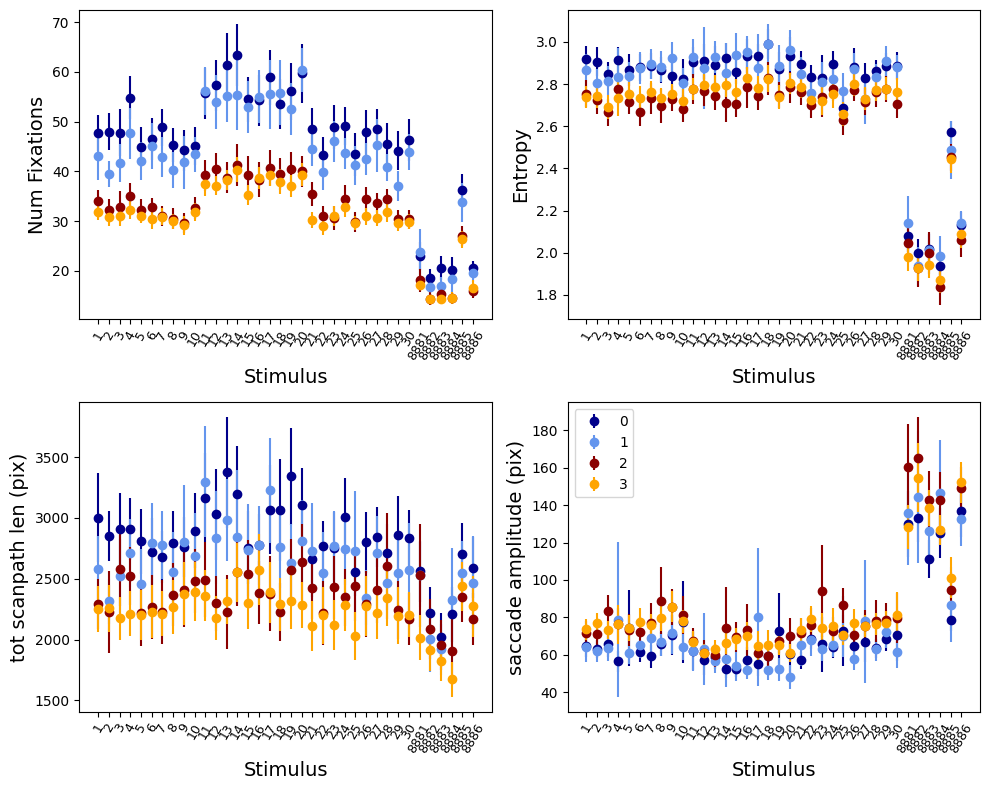

In [24]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1','2','3'])

In [7]:
WhichC, WhichCN = DyslexiaDat.GetGroups('Group')

Conditions [ 1.  2.  3.  4. nan]


In [10]:
WhichC = np.array(WhichC, dtype=float)
WhichC[np.isnan(WhichC)] = 4
WhichC = WhichC.astype(int)
WhichC[WhichC == 0] = 1
WhichC[WhichC == 2] = 0
WhichC[WhichC == 3] = 0
WhichC[WhichC == 4] = 0
WhichC

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [9]:
# convert WhichCN to a numpy array of type float
WhichCN = np.array(WhichCN, dtype=float)
# substitute nan values with max value + 1
WhichCN[np.isnan(WhichCN)] = 0 
WhichCN = WhichCN.astype(int)
# Trasform all 4 in 0
WhichCN[WhichCN == 4] = 0
WhichCN[WhichCN == 3] = 0
# Trasform all 1,2 in 1
WhichCN[WhichCN == 2] = 1
WhichCN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0])

In [29]:
from PyEyeSim.visualhelper import MeanPlot
from scipy import stats
def CompareGroupsFix(self,WhichC, class_labels=None):
    '''
    Description: Run a set of between-group fixation comparisons, generate plots, and print descriptive statistics.
    should work for 2-4 groups
    calculates:
    - number of fixations
    - entropy of fixations (potentially long run time)
    - total scanpath length
    - saccade amplitude

    prints descriptive stats of the above
    print pairwise comparison of groups with the above measures
    
    Arguments: 
    betwcond (str): Name of the conditions for between-group fixation comparisons.
    '''
    
    print('!runnning between group comparison')
    if hasattr(self,'entropies')==False:   # check if entropy has already been calculated
        print('Calculating entropy')
        Entropies,self.entropmax,self.entropies_ind=self.GetEntropies()
    Cols=['darkblue','cornflowerblue','darkred','orange','salmon']
    #plt.figure(figsize=(8,8))
    fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(10,8))
    Entrs=[]
    Fixies=[]
    ScanpLs=[]
    SaccAmpls=[] 
    for cc,c in enumerate(class_labels):
        c = int(c)
        Idx=np.nonzero(WhichC==cc)[0]
        FixGr=np.array(self.nfix[Idx,:])
        EntrGr=self.entropies_ind[Idx,:]
        Entrs.append(np.nanmean(EntrGr,1))
        Fixies.append(np.nanmean(FixGr,1))
        ScanpLs.append(np.nanmean(self.len_scanpath[Idx,:],1))
        SaccAmpls.append(np.nanmean(self.sacc_ampl[Idx,:],1))
     
        print(cc,c,'num participants: ',len(Idx))

        print(cc,c,'Num fix= ',np.round(np.mean(np.nanmean(FixGr,1)),2),'+/-',np.round(np.std(np.nanmean(FixGr,1)),2))
        print(cc,c,'max num fix= ',np.round(np.max(np.nanmean(FixGr,1)),2))
        print(cc,c,'min num fix= ',np.round(np.min(np.nanmean(FixGr,1)),2))
        print(cc,c,'Entropy= ',np.round(np.mean(np.nanmean(EntrGr,1)),2),'+/-',np.round(np.std(np.nanmean(EntrGr,1)),2))
        print(cc,c,'tot scanpath len = ',np.round(np.mean(np.nanmean(self.len_scanpath[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.len_scanpath[Idx,:],1)),2),'pix')
        print(cc,c,'saccade amplitude = ',np.round(np.mean(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'+/-',np.round(np.std(np.nanmean(self.sacc_ampl[Idx,:],1)),2),'pix')
        print('')
        MeanPlot(self.np,FixGr,yLab='Num Fixations',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,0])
        MeanPlot(self.np,EntrGr,yLab='Entropy',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[0,1])
        MeanPlot(self.np,self.len_scanpath[Idx,:],yLab='tot scanpath len (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,0])
        MeanPlot(self.np,self.sacc_ampl[Idx,:],yLab='saccade amplitude (pix)',xtickL=self.stimuli,label=class_labels[c],color=Cols[cc],ax=ax[1,1])
    
    
    plt.legend()
    plt.tight_layout()

    return 

!runnning between group comparison
0 0 num participants:  119
0 0 Num fix=  31.52 +/- 6.06
0 0 max num fix=  68.45
0 0 min num fix=  21.14
0 0 Entropy=  2.63 +/- 0.17
0 0 tot scanpath len =  2300.54 +/- 531.55 pix
0 0 saccade amplitude =  84.34 +/- 20.42 pix

1 1 num participants:  81
1 1 Num fix=  44.77 +/- 9.27
1 1 max num fix=  79.17
1 1 min num fix=  30.09
1 1 Entropy=  2.74 +/- 0.17
1 1 tot scanpath len =  2748.51 +/- 508.78 pix
1 1 saccade amplitude =  73.46 +/- 15.18 pix



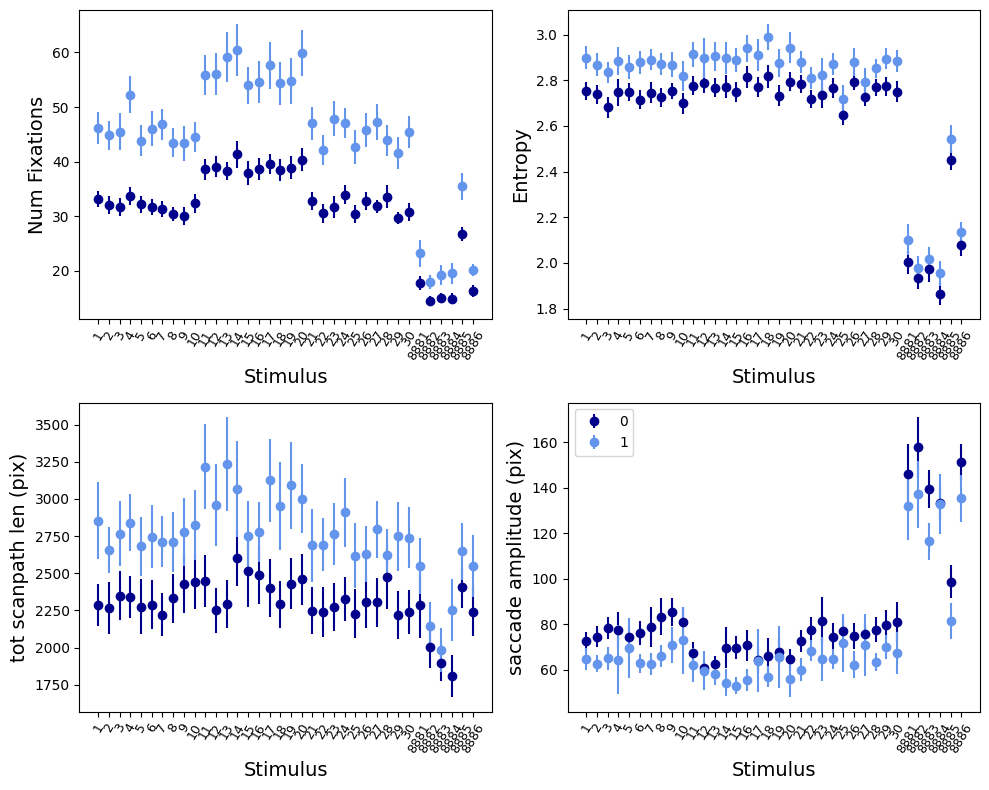

In [30]:
CompareGroupsFix(DyslexiaDat, WhichC, class_labels=['0','1'])

In [31]:
Idx=np.nonzero(WhichC==1)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
#remove nan values
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[ 17.  53.  72.  48.  42.  93.  51.  62.  48.  56.  59.  70.  49.  73.
  69.  50.  53.  54.  42.  57.  nan  54.  66.  52.  34.  47.  78. 107.
  50.  54.  41.  49.  29.  49.  52.  82.  62.  61.  58.  98.  85.  67.
  71.  49.  nan  39.  49.  70.  68. 102.  69.  40.  44.  53.  58.  67.
  64. 104.  57.  96.  65.  76.  65.  64.  69.  39.   9.  nan  77.  nan
  43.  76.  58.  84.  46.  60.  61.  74.  41.  49.  65.]
max num fix=  107.0
min num fix=  9.0
average num fix=  59.922077922077925


In [32]:
Idx=np.nonzero(WhichC==0)[0]
FixGr=np.array(DyslexiaDat.nfix[Idx,19])
print(FixGr)
# remove 1 max and 1 min value
FixGr = FixGr[~np.isnan(FixGr)]
print('max num fix= ',np.max(FixGr))
print('min num fix= ',np.min(FixGr))
print('average num fix= ',np.mean(FixGr))

[43. 45. 32. 46. 30. 56. 27. 32. 53. 40. 33. 49. 54. 41. 47. 33. 73. 25.
 29. 45. 99. 31. 48. 28. 43. 50. 25. 48. 50. 32. 38. 31. 51. 28. 27. 29.
 35. 38. 32. 50. 35. 45. 45. 30. 48. 37. 54. 52. 42. 42. 51. 42. 33. 40.
 38. 38. 42. 37. 32. 27. 42. 40. 40. 28. 37. 26. nan 44. 51. 39. 45. 46.
 34. 34. 38. 49. 52. 57. 40. 33. 36. 42. 58. 46. 30. 32. 37. 51. 41. 31.
 77. 46. 38. 36. 33. 48. 43. 50. 42. 24. 28. nan 20. 29. 24. 35. 30. 38.
 56. 39. 38. 34. 35. 39. 47. 30. 44. 39. 45.]
max num fix=  99.0
min num fix=  20.0
average num fix=  40.35897435897436


In [11]:
SaccadeObj=DyslexiaDat.GetSaccades()
Saccades=DyslexiaDat.SaccadeSel(SaccadeObj,nHor=1)

In [12]:
def angles_entropy(angles, bins):
    hist, _ = np.histogram(angles, bins=bins)
    hist = hist / hist.sum()
    return -np.sum(hist * np.log2(hist))

In [ ]:
Saccades = Saccades[0:117, :]
WhichC_Munich = WhichC[0:117]

Group 0
Angle Entropy: 7.114319960071477
---------------------------------------------------------
Group 1
Angle Entropy: 7.396763654882683
---------------------------------------------------------
 
t-test between groups 0 and 1
t: -1.559467845302823, p: 0.11888775137063351
 


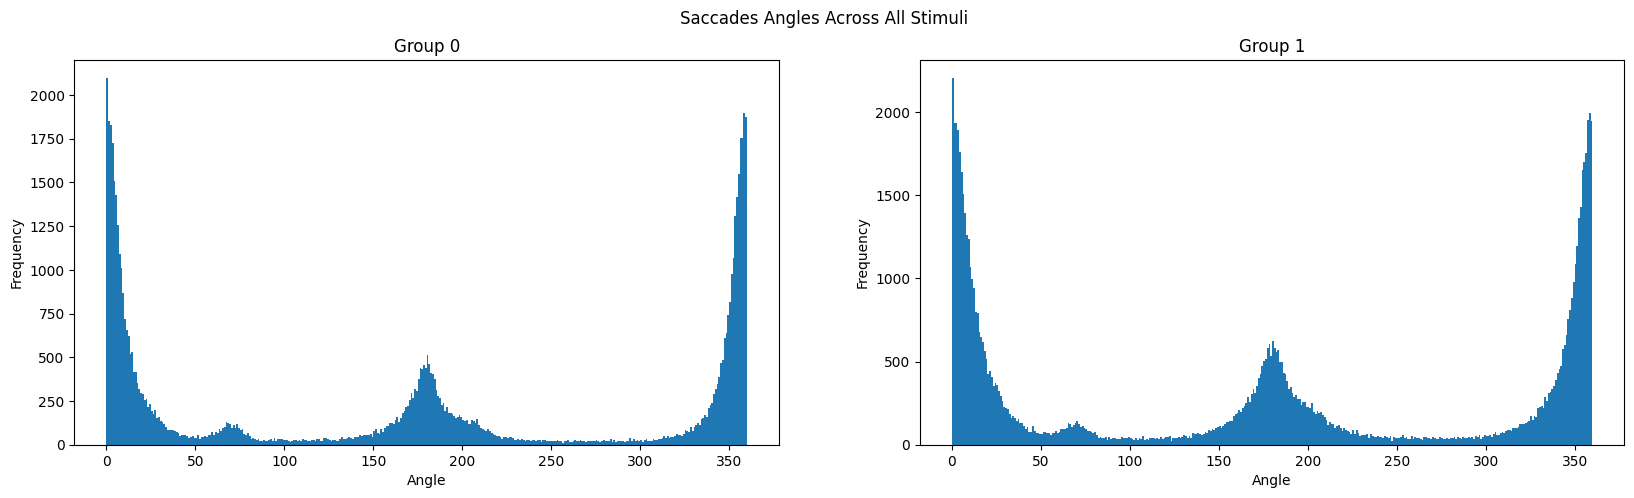

In [52]:
from scipy.stats import ttest_ind
# Initialize variables to store aggregated data
aggregated_angles = {group: [] for group in np.unique(WhichC_Munich)}

# Iterate over all stimuli
for stim in range(DyslexiaDat.np):
    groups = np.unique(WhichC_Munich)
    group_saccades = []
    
    # Collect saccades for each group
    for group in groups:
        group_saccades.append(Saccades[WhichC_Munich == group, stim, :, :])
    
    # Aggregate angles for each group
    for j, group in enumerate(group_saccades):
        for subj in group:
            for h in range(subj.shape[0]):
                for v in range(subj.shape[1]):
                    for val in subj[h, v]:
                        aggregated_angles[groups[j]].append(val)

# Plot the aggregated results
fig, ax = plt.subplots(1, len(aggregated_angles), figsize=(20, 5))
fig.suptitle('Saccades Angles Across All Stimuli')

for i, (group, angles) in enumerate(aggregated_angles.items()):
    ax[i].hist(angles, bins=360)
    ax[i].set_title(f'Group {group}')
    ax[i].set_xlabel('Angle')
    ax[i].set_ylabel('Frequency')
    print(f'Group {group}')
    print(f'Angle Entropy: {angles_entropy(angles, 360)}')
    print(f'---------------------------------------------------------')

# Perform t-test between groups
group_keys = list(aggregated_angles.keys())
t, p = ttest_ind(aggregated_angles[group_keys[0]], aggregated_angles[group_keys[1]])
print(' ')
print(f't-test between groups {group_keys[0]} and {group_keys[1]}')
print(f't: {t}, p: {p}')
print(' ')

plt.show()


In [11]:
# create a list of subjects from 117 to 200
GrazSubs = DyslexiaDat.subjects[117:200]
GrazSubs_Idx = list(range(117,200))
MunichSubs_Idx = list(range(0,117))

In [42]:
# SimVals[subjects][group]
def calculate_accuracy(SimVals, WhichCN, Idx):
    correct_labels = 0

    for i, subj in enumerate(Idx):
        # Calculate the mean for each group for the current subject
        predicted_group = 0
        min_mean = np.inf
        for j in range(np.unique(WhichCN).size):
            if len(SimVals[i][j]) > 0:
                mean = np.mean(SimVals[i][j])
            else:
                continue
            if mean <= min_mean:
                min_mean = mean
                predicted_group = j
        
        # Check if the predicted group matches the true group
        if predicted_group == WhichCN[subj]:
            correct_labels += 1
    
    # Calculate accuracy
    accuracy = correct_labels / len(Idx)
    print(f'Accuracy: {accuracy * 100:.2f}%')

In [43]:
stimn = 28

In [44]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=0, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

In [45]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 50.43%


In [47]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=False, nosubj=GrazSubs_Idx)

C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\_scanpathsim.py:657: RuntimeWarning: Mean of empty slice
  SimVals[s1_idx][group].append(np.nanmean(tot_val))


In [48]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 51.28%


---

In [49]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=1, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [50]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 70.09%


In [51]:
SaccadeObj = DyslexiaDat.GetSaccades()
Saccades = DyslexiaDat.SaccadeSingleSel(SaccadeObj, nHor=1, stim=stimn, nVer=20, InferS=False)
SimVals = DyslexiaDat.SacSimSubj2Group(Saccades, WhichCN, MunichSubs_Idx, method='peak180',  match=True, nosubj=GrazSubs_Idx)

In [52]:
calculate_accuracy(SimVals, WhichCN, MunichSubs_Idx)

Accuracy: 57.26%


---

## MLP

We define a multilayer perceptron (MLP) to train over specific features extracted from the data.

We start from the Similarity features of a single stimulus

In [53]:
from sklearn.preprocessing import StandardScaler

def vectorize(SimAndFeatureVals):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    return vector_roi

In [65]:
from PyEyeSim import test
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(4, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

tot_subj = len(MunichSubs_Idx)
labels = np.array([WhichCN[sub] for sub in MunichSubs_Idx])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    train_subj = train_index
    test_subj = test_index

    remove_subj = np.append(test_subj, np.array(GrazSubs_Idx))

    # Train set
    with io.capture_output() as _:
        #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj))
    vector_roi = vectorize(SimAndFeatureVals)
    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    with io.capture_output() as _:
        #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
        SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
    vector_roi = vectorize(SimAndFeatureVals)
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6987417340278625
Epoch 5 loss: 0.6251329779624939
Epoch 10 loss: 0.6039105653762817
Epoch 15 loss: 0.5883285999298096
Epoch 0 loss: 0.7519596815109253
Epoch 5 loss: 0.6094505190849304
Epoch 10 loss: 0.5734124779701233
Epoch 15 loss: 0.5652734637260437
Epoch 0 loss: 0.7345123291015625
Epoch 5 loss: 0.6628328561782837
Epoch 10 loss: 0.6548232436180115
Epoch 15 loss: 0.6390843987464905
Epoch 0 loss: 0.738918125629425
Epoch 5 loss: 0.6527847647666931
Epoch 10 loss: 0.6153562664985657
Epoch 15 loss: 0.6038174033164978
Epoch 0 loss: 0.7045061588287354
Epoch 5 loss: 0.5855401754379272
Epoch 10 loss: 0.5659323930740356
Epoch 15 loss: 0.558406412601471
Average accuracy: 0.6586956521739131
Standard deviation: 0.14290527514530812
Total confusion matrix:
[[38. 21.]
 [19. 39.]]
False positives: 21.0
False negatives: 19.0


Now we proceed to test the same model but over multiple stimuli

In [60]:
list(set_subj)

[2, 8, 10, 14, 15, 17, 20, 25, 27, 32, 41, 43, 44, 53, 55, 64, 66, 73, 91, 115]

In [63]:
#stimuli = [3, 13, 25, 34]
stimuli = [3, 13]

In [168]:
def vectorize(SimAndFeatureVals , vec):
    _, SimsVals = SimAndFeatureVals
    vector_roi = np.zeros((len(SimsVals), 4))
    for subj in range(len(SimsVals)):
        vector_roi[subj][0] = SimsVals[subj][0][0][0]
        vector_roi[subj][1] = SimsVals[subj][0][0][1]
        vector_roi[subj][2] = SimsVals[subj][0][0][2]
        vector_roi[subj][3] = SimsVals[subj][0][0][3]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [170]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(8, 2)
        self.softmax = nn.Softmax(dim=1)
        
        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=list(remove_subj)) # 81.47% +- 11.22
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for stim in stimuli:
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=10)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6723659038543701
Epoch 5 loss: 0.5143190622329712
Epoch 10 loss: 0.5008633136749268
Epoch 15 loss: 0.494373619556427
Epoch 0 loss: 0.6599166393280029
Epoch 5 loss: 0.5108235478401184
Epoch 10 loss: 0.49130988121032715
Epoch 15 loss: 0.48304182291030884
Epoch 0 loss: 0.661562442779541
Epoch 5 loss: 0.5036697387695312
Epoch 10 loss: 0.4697260856628418
Epoch 15 loss: 0.45373252034187317
Epoch 0 loss: 0.7307984232902527
Epoch 5 loss: 0.6570238471031189
Epoch 10 loss: 0.572294294834137
Epoch 15 loss: 0.525486946105957
Epoch 0 loss: 0.725956380367279
Epoch 5 loss: 0.5986025929450989
Epoch 10 loss: 0.5328891277313232
Epoch 15 loss: 0.5114946961402893
Average accuracy: 0.8147368421052631
Standard deviation: 0.11222504102826165
Total confusion matrix:
[[43.  9.]
 [ 9. 36.]]
False positives: 9.0
False negatives: 9.0


We can notice an important improvment in the perfromance

Now we extract more features and we test this global feature in coparison with the similarity features and with the combined features (similarity + global features)

In [69]:
from scipy.stats import entropy
def get_entropy(self, subj, stim):
    # get fixation (array([x]), array([y]))
    fixations = DyslexiaDat.GetFixationData(DyslexiaDat.subjects[subj], DyslexiaDat.stimuli[stim])
    # calculate entropy of the fixation distribution
    sizeX = self.x_size
    sizeY = self.y_size
    x = fixations[0].tolist()
    y = fixations[1].tolist()
    # create a 2D histogram
    H, xedges, yedges = np.histogram2d(x, y, bins=(sizeX, sizeY))
    # normalize the histogram
    H = H / H.sum()
    # calculate entropy
    ent = entropy(H.flatten())
    return ent

In [54]:
def GlobalFeature(self, Saccades, stim):
    Features = np.empty((self.ns), dtype=object)
    for s in range(self.ns):
        angles = []
        progressive_s = 0
        regressive_s = 0
        for saccade in Saccades[s][stim]:
            angles.append(saccade.Angle())
            if saccade.Angle() > 270 or saccade.Angle() < 90:
                progressive_s += 1
            elif saccade.Angle() > 90 and saccade.Angle() < 270:
                regressive_s += 1
        
        fix_durations = DyslexiaDat.GetDurations(DyslexiaDat.subjects[s], DyslexiaDat.stimuli[stim])

        Features[s] = {'number_fixation':  self.nfixations[s][stim],
                       'fixation_entropy': get_entropy(self, s, stim),
                       'mean_fixation_duration': np.mean(fix_durations),
                       'std_fixation_duration': np.std(fix_durations),
                       'total_reading_duration': np.sum(fix_durations),
                       'mean_saccade_amplitude': np.mean(angles),
                       'std_saccade_amplitude': np.std(angles),
                       'regression': regressive_s,
                       'progression/regression': progressive_s if regressive_s == 0 else progressive_s/regressive_s
                        }
    return Features

In [ ]:
GlobalFeature_array = []
Saccades = DyslexiaDat.GetSaccades()
for stim in stimuli:
    GlobalFeature_array.append(GlobalFeature(DyslexiaDat, Saccades, stim))
    print(f'Global features for stimulus {stim} calculated')

C:\Users\nickp\AppData\Local\Temp\ipykernel_17748\641606591.py:13: RuntimeWarning: invalid value encountered in divide
  H = H / H.sum()
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\nickp\.conda\envs\eyesim\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide


Global features for stimulus 3 calculated
Global features for stimulus 13 calculated


In [289]:
def vectorize(subj, stim, vec):
    vector_roi = np.zeros((len(subj), 6))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_saccade_amplitude']
        vector_roi[s][2] = Features['mean_fixation_duration']
        vector_roi[s][3] = Features['total_reading_duration']
        vector_roi[s][4] = Features['regression']
        vector_roi[s][5] = Features['progression/regression']

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [301]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(12, 6)
        self.fc2 = nn.Linear(6, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(x)
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        vector_roi = vectorize(subj=train_subj, stim=s, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        vector_roi = vectorize(subj=test_subj, stim=s, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=1, momentum=0.8)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6869509816169739
Epoch 5 loss: 0.5746850967407227
Epoch 10 loss: 0.5473429560661316
Epoch 15 loss: 0.5403509140014648
Epoch 0 loss: 0.6726154088973999
Epoch 5 loss: 0.5916111469268799
Epoch 10 loss: 0.5715774297714233
Epoch 15 loss: 0.5650465488433838
Epoch 0 loss: 0.8209947347640991
Epoch 5 loss: 0.5773469805717468
Epoch 10 loss: 0.4392339885234833
Epoch 15 loss: 0.41849544644355774
Epoch 0 loss: 0.6329652070999146
Epoch 5 loss: 0.47243520617485046
Epoch 10 loss: 0.40738967061042786
Epoch 15 loss: 0.38661229610443115
Epoch 0 loss: 0.6345199942588806
Epoch 5 loss: 0.5210577845573425
Epoch 10 loss: 0.4269811809062958
Epoch 15 loss: 0.41264528036117554
Average accuracy: 0.7980392156862746
Standard deviation: 0.16669101449734078
Total confusion matrix:
[[44.  5.]
 [13. 26.]]
False positives: 5.0
False negatives: 13.0


Firstly we can notice that only the global features are giving good performance, but lower compared to the similarity features.

In [283]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 10))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]
        vector_roi[s][8] = SimAndFeatureVals[s][0][0][6]
        vector_roi[s][9] = SimAndFeatureVals[s][0][0][7]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [ ]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(20, 10)
        self.fc2 = nn.Linear(10, 5)
        self.fc3 = nn.Linear(5, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj)) # 86.34% +- 10.18
        vector_roi = vectorize(SimAndFeatureVals, subj=train_subj, stim=s, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, subj=test_subj, stim=s, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.8)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.6876999139785767
Epoch 5 loss: 0.6297074556350708
Epoch 10 loss: 0.5394906997680664
Epoch 15 loss: 0.45104098320007324
Epoch 0 loss: 0.6837373971939087
Epoch 5 loss: 0.5452319383621216
Epoch 10 loss: 0.43131402134895325
Epoch 15 loss: 0.391909658908844
Epoch 0 loss: 0.7061272859573364
Epoch 5 loss: 0.6050487756729126
Epoch 10 loss: 0.5191890001296997
Epoch 15 loss: 0.4567969739437103
Epoch 0 loss: 0.6338627934455872
Epoch 5 loss: 0.4863075911998749
Epoch 10 loss: 0.4183765649795532
Epoch 15 loss: 0.385226845741272
Epoch 0 loss: 0.642243504524231
Epoch 5 loss: 0.5617563128471375
Epoch 10 loss: 0.48113781213760376
Epoch 15 loss: 0.4458499550819397
Average accuracy: 0.8633986928104577
Standard deviation: 0.10183082047258765
Total confusion matrix:
[[45.  4.]
 [ 8. 31.]]
False positives: 4.0
False negatives: 8.0


Using all the features together we can obtain the best performance.

In [302]:
def vectorize(SimAndFeatureVals, subj, stim, vec):
    vector_roi = np.zeros((len(subj), 8))
    for s, subj_id in enumerate(subj):
        # add general features
        Features = GlobalFeature_array[stim][subj_id]
        vector_roi[s][0] = Features['number_fixation']
        vector_roi[s][1] = Features['mean_fixation_duration']
        vector_roi[s][2] = Features['total_reading_duration']
        vector_roi[s][3] = Features['regression']
        vector_roi[s][4] = Features['progression/regression']
        vector_roi[s][5] = SimAndFeatureVals[s][0][0][3]
        vector_roi[s][6] = SimAndFeatureVals[s][0][0][4]
        vector_roi[s][7] = SimAndFeatureVals[s][0][0][5]

    if vec.size != 0:
        vector_roi = np.append(vector_roi, vec, axis=1)
    return vector_roi

In [303]:
import torch
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from IPython.utils import io
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler

torch.manual_seed(42)
np.random.seed(42)

# Define the neural network
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(16, 8)
        self.fc2 = nn.Linear(8, 4)
        self.fc3 = nn.Linear(4, 2)
        self.softmax = nn.Softmax(dim=1)

        # Initialize weights using Xavier uniform
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x
    
accuracy = []
conf_matrix = np.zeros((2, 2))

subj = list(set(MunichSubs_Idx) - set_subj)

tot_subj = len(subj)
labels = np.array([WhichCN[sub] for sub in subj])

# Stratified 5-Fold cross-validation to maintain label distribution
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

for train_index, test_index in skf.split(np.zeros(tot_subj), labels):
    best_loss = np.inf
    test_subj = [subj[i] for i in test_index]
    train_subj = [subj[i] for i in train_index]

    remove_subj = np.append(test_index, np.array(GrazSubs_Idx))

    # Train set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180', nosubj=list(test_subj))
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(train_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=list(remove_subj)) # 86.34% +- 10.18
        vector_roi = vectorize(SimAndFeatureVals, subj=train_subj, stim=s, vec=vector_roi)
    
    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)

    labels_train = np.array([WhichCN[sub] for sub in train_subj])

    # Train set
    X_train = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_train = torch.tensor(labels_train, dtype=torch.long).to(device) 

    # Test set
    vector_roi = np.array([])
    for s, stim in enumerate(stimuli):
        with io.capture_output() as _:
            #SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(0, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, nHor_f=2, nVer_f=2, inferS=False, method='peak180')
            SimAndFeatureVals = DyslexiaDat.SacSimSubj2GroupPlusFeature(stim, WhichCN, subjects=list(test_subj), nHor=1, nVer=1, inferS=False, method='peak180', match=True, nosubj=GrazSubs_Idx) 
        vector_roi = vectorize(SimAndFeatureVals, subj=test_subj, stim=s, vec=vector_roi)

    # apply standardization
    scaler = StandardScaler()
    vector_roi = scaler.fit_transform(vector_roi)
    
    labels_test = np.array([WhichCN[sub] for sub in test_subj])

    # Test set
    X_test = torch.tensor(vector_roi, dtype=torch.float32).to(device)
    y_test = torch.tensor(labels_test, dtype=torch.long).to(device) 

    # Initialize the model, loss function, and optimizer
    model = NN().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.8)

    # Train the model
    model.train()
    for epoch in range(20):  # number of epochs
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        # print loss every 5 epochs
        if epoch % 5 == 0:
            print(f'Epoch {epoch} loss: {loss.item()}')

        if loss < best_loss:
            # save checkpoint
            checkpoint = {'model': model, 'state_dict': model.state_dict(), 'optimizer': optimizer.state_dict()}
            best_loss = loss

    # Load the best model
    model.load_state_dict(checkpoint['state_dict'])
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        predictions = torch.argmax(outputs, dim=1)  # Take the class with highest probability
        accuracy.append(accuracy_score(y_test.cpu(), predictions.cpu()))
        conf_matrix += confusion_matrix(y_test.cpu(), predictions.cpu())

# Results
accuracy = np.array(accuracy)
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')
print(f'False positives: {conf_matrix[0, 1]}')
print(f'False negatives: {conf_matrix[1, 0]}')

Using device: cuda
Epoch 0 loss: 0.7350379824638367
Epoch 5 loss: 0.6252416372299194
Epoch 10 loss: 0.5369002223014832
Epoch 15 loss: 0.48428061604499817
Epoch 0 loss: 0.6451428532600403
Epoch 5 loss: 0.5884621739387512
Epoch 10 loss: 0.5162153244018555
Epoch 15 loss: 0.44823315739631653
Epoch 0 loss: 0.6950563788414001
Epoch 5 loss: 0.6844687461853027
Epoch 10 loss: 0.6694110035896301
Epoch 15 loss: 0.6251591444015503
Epoch 0 loss: 0.67841637134552
Epoch 5 loss: 0.6152471899986267
Epoch 10 loss: 0.5430858731269836
Epoch 15 loss: 0.4701516628265381
Epoch 0 loss: 0.7052639126777649
Epoch 5 loss: 0.6134114861488342
Epoch 10 loss: 0.5197785496711731
Epoch 15 loss: 0.46030011773109436
Average accuracy: 0.841830065359477
Standard deviation: 0.09097888962774021
Total confusion matrix:
[[45.  4.]
 [10. 29.]]
False positives: 4.0
False negatives: 10.0


Removing some features (that we already tested in the ETDD70 dataset) we can see that the performance is still good, with a lower average accuracy and a lower standard deviation.

---

## CNN 

We proceed to transform the fixation in a continuous signal and calculate the magnitude of the signal in the time domain that it will be used as input for a convolutional neural network.

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from scipy.stats import entropy
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct
from scipy.fft import fft

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [69]:
FixData['Group'].unique()

array([ 4.,  1.,  3.,  2., nan])

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft

def get_data(stim, split_size, batch_size, random_state, verbose=False):
    # Splitting by participants
    # Remove subjects that start with P
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data=FixData2[FixData2['stimulus']==stim]
    subj = Data['subject'].unique()
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # change train labels
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Pad the data to the same length (number of rows for subject)
    max_length_train = max(len(train_data[(train_data['subject'] == subj) & 
                                    ((train_data['Group'] == 4.0) | (train_data['Group'] == 3.0))]) 
                     for subj in train_participants)
    max_length_test = max(len(test_data[(test_data['subject'] == subj) &
                                    ((test_data['Group'] == 4.0) | (test_data['Group'] == 3.0))])
                        for subj in test_participants)
    pad = max(max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")

    # "Eye tracking based dyslexia detection using a holistic approach"
    # Step 1: Perform DCT Type III (and interpoalte Step 2)
    def perform_dct_interpolate(data, pad_size):
        # sqrt(2/pad_size) * cn * cos((pi * ((2*k + 1) * n)) / (2 * pad_size)) k = 0, 1, ..., pad_size - 1 n = 0, 1, ..., pad_size - 1
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result
    
    # Step 3: Perform IDCT Type III
    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result
    
    # Step 4: Energy correction based on number of zeros
    def correct_energy(data, original_length):
        # Calculate the ratio of the original length to the padded length
        ratio = original_length / data.shape[0]
        return data * ratio
    
    # Step 5: Perform Discrete Fourier Transform (DFT)
    def perfrom_dft(data):
        return fft(data, axis=0)
    
    # Step 6: Magnitude calculation
    def calculate_magnitude(data):
        return np.abs(data)
    
    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        #for the final data we can return just N/2 as the data is symmetric
        final_data = magnitude[:magnitude.shape[0]//2]
        return final_data
    
    # Apply the pipeline to all participants

    train_features = []
    test_features = []
    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))
    
    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)
    
    # Create DataLoader
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    
    return train_loader, test_loader, train_features, train_labels, test_features, test_labels

In [128]:
stimulus = DyslexiaDat.stimuli[12]

In [139]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 103
Test participants: 12
Pad size: 60


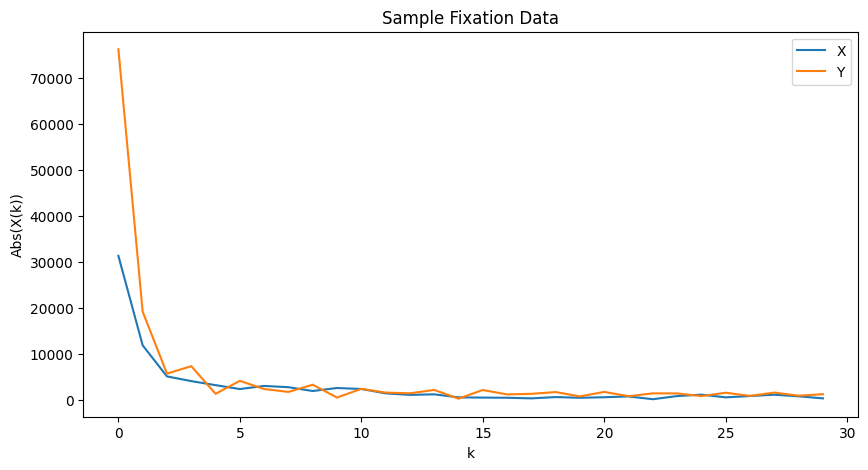

In [145]:
plt.figure(figsize=(10, 5))
plt.plot(train_data[0, :, 0], label='X')
plt.plot(test_data[0, :, 1], label='Y')
plt.xlabel('k')
plt.ylabel('Abs(X(k))')
plt.title('Sample Fixation Data')
plt.legend()
plt.show()

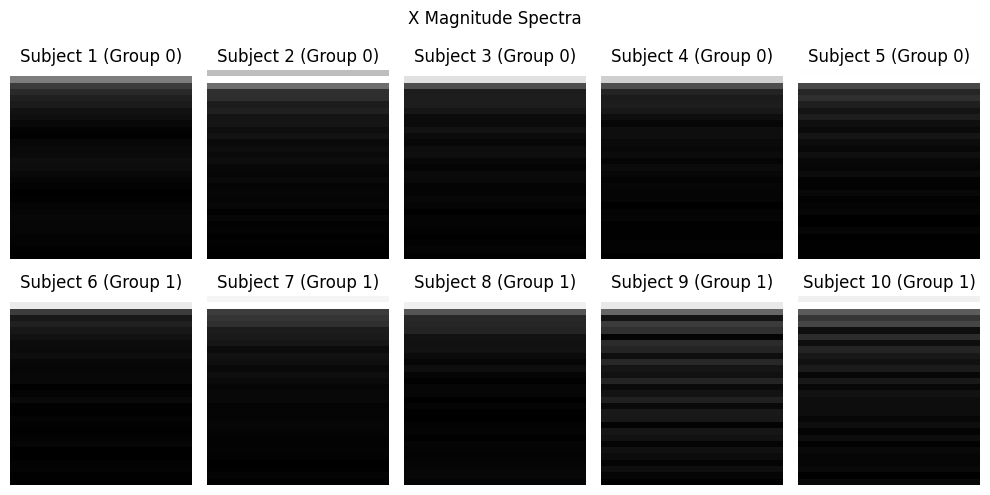

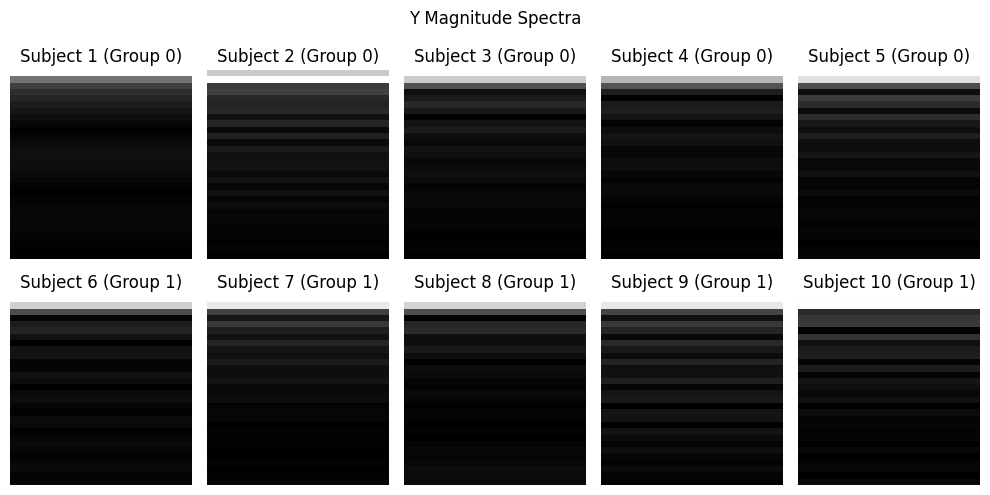

In [175]:
def plot_group_spectra(features, labels, title, channel):
    """
    Plots magnitude spectra for 5 subjects with label 0 vs. 5 subjects with label 1
    in a vertical grayscale heatmap.
    """
    plt.figure(figsize=(10, 5))
    for i in range(5):
        plt.subplot(2, 5, i + 1)
        plt.imshow(features[labels.squeeze() == 0][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+1} (Group 0)')
        plt.axis('off')

    for i in range(5):
        plt.subplot(2, 5, i + 6)
        plt.imshow(features[labels.squeeze() == 1][i][:, channel].reshape(-1, 1), aspect='auto', cmap='gray')
        plt.title(f'Subject {i+6} (Group 1)')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()
    
# Plot for X and Y magnitudes
plot_group_spectra(train_data, train_labels, 'X Magnitude Spectra', channel=0)
plot_group_spectra(train_data, train_labels, 'Y Magnitude Spectra', channel=1)

In [180]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2):
        super(CNN, self).__init__()
        # Three Conv1d layers with kernel_size=3, stride=1, padding=1
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # MaxPool1d layer (kernel_size=2, stride=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Activation function
        self.relu = nn.ReLU()
        
        # Fully connected layer
        final_seq_len = 30 // 2  # integer division
        # The flattened feature dimension will be: 32 channels * final_seq_len
        self.fc = nn.Linear(32 * final_seq_len, num_classes)

    def forward(self, x):
        # Input x shape: [batch, sequence_length, channels]
        # Transpose to [batch, channels, sequence_length] for Conv1d
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the features for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [181]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim=stimulus, split_size=0.1, batch_size=8, random_state=i
    )
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes=num_classes, input_channels=2).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 20  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 5/20, Loss: 7.5453
Epoch 10/20, Loss: 2.2530
Epoch 15/20, Loss: 4.8308
Epoch 20/20, Loss: 1.0704
Epoch 5/20, Loss: 15.6852
Epoch 10/20, Loss: 4.6636
Epoch 15/20, Loss: 2.1975
Epoch 20/20, Loss: 1.4034
Epoch 5/20, Loss: 3.8607
Epoch 10/20, Loss: 1.8835
Epoch 15/20, Loss: 1.2118
Epoch 20/20, Loss: 0.4838
Epoch 5/20, Loss: 6.1839
Epoch 10/20, Loss: 2.0920
Epoch 15/20, Loss: 2.9411
Epoch 20/20, Loss: 1.5193
Epoch 5/20, Loss: 5.2401
Epoch 10/20, Loss: 1.1130
Epoch 15/20, Loss: 0.7517
Epoch 20/20, Loss: 3.8172
Average Test Accuracy: 51.67%
Standard Deviation: 8.16


## Multiple stimuli

In [491]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from scipy.fftpack import dct, idct
from scipy.fft import fft
import numpy as np
import torch

def get_data(stim_list, split_size, batch_size, random_state, verbose=False):
    # Filter by stimuli list and remove subjects that start with 'P'
    FixData2 = FixData[~FixData['subject'].str.startswith('P')]
    map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]
    FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]
    Data = FixData2[FixData2['stimulus'].isin(stim_list)]
    subj = Data['subject'].unique()

    
    # Split by participants
    train_participants, test_participants = train_test_split(subj, test_size=split_size, random_state=random_state)
    train_data = Data[Data['subject'].isin(train_participants)]
    test_data = Data[Data['subject'].isin(test_participants)]
    
    train_labels = train_data.groupby('subject')['Group'].first().values
    test_labels = test_data.groupby('subject')['Group'].first().values

    # Binary label transformation
    train_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in train_labels])
    test_labels = np.array([1 if (np.isnan(val) or val == 1.0 or val == 2.0) else 0 for val in test_labels])

    # Determine padding size
    pad = 0
    for stim in stim_list:
        max_length_train = max(len(train_data[(train_data['subject'] == subj) & (train_data['stimulus'] == stim) &
                                            ((train_data['Group'] == 4.0) | (train_data['Group'] == 3.0))]) 
                            for subj in train_participants)
        max_length_test = max(len(test_data[(test_data['subject'] == subj)  & (test_data['stimulus'] == stim) &
                                            ((test_data['Group'] == 4.0) | (test_data['Group'] == 3.0))]) 
                            for subj in test_participants)
        pad = max(pad, max_length_train, max_length_test)

    if verbose:
        print(f"Train participants: {len(train_participants)}")
        print(f"Test participants: {len(test_participants)}")
        print(f"Pad size: {pad}")
        print(f"Using stimuli: {stim_list}")

    # DCT, IDCT, energy correction, DFT, magnitude
    def perform_dct_interpolate(data, pad_size):
        dct_result = np.zeros((pad_size, data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(pad_size):
                cn = np.sqrt(2 / pad_size) if k != 0 else np.sqrt(1 / pad_size)
                dct_result[k, n] = cn * np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * pad_size)))
        return dct_result

    def perform_idct(data):
        idct_result = np.zeros((data.shape[0], data.shape[1]))
        for n in range(data.shape[1]):
            for k in range(data.shape[0]):
                idct_result[k, n] = np.sum(data[:, n] * np.cos((np.pi * (2 * np.arange(data.shape[0]) + 1) * k) / (2 * data.shape[0])) * 
                                           (np.sqrt(2 / data.shape[0]) if k != 0 else np.sqrt(1 / data.shape[0])))
        return idct_result

    def correct_energy(data, original_length):
        ratio = original_length / data.shape[0]
        return data * ratio

    def perfrom_dft(data):
        return fft(data, axis=0)

    def calculate_magnitude(data):
        return np.abs(data)

    def data_output(data, pad_size):
        dct_result = perform_dct_interpolate(data, pad_size)
        idct_result = perform_idct(dct_result)
        corrected_data = correct_energy(idct_result, len(data))
        dft_result = perfrom_dft(corrected_data)
        magnitude = calculate_magnitude(dft_result)
        return magnitude[:magnitude.shape[0] // 2]

    # Process all train/test participants
    train_features = []
    test_features = []

    for subj in train_participants:
        data = train_data[train_data['subject'] == subj].iloc[:, 5:7].values
        train_features.append(data_output(data, pad))

    for subj in test_participants:
        data = test_data[test_data['subject'] == subj].iloc[:, 5:7].values
        test_features.append(data_output(data, pad))

    # Convert to PyTorch tensors
    train_features = torch.tensor(train_features, dtype=torch.float32)
    test_features = torch.tensor(test_features, dtype=torch.float32)
    train_labels = torch.tensor(train_labels, dtype=torch.float32).unsqueeze(1)
    test_labels = torch.tensor(test_labels, dtype=torch.float32).unsqueeze(1)

    # Create DataLoaders
    train_dataset = TensorDataset(train_features, train_labels)
    test_dataset = TensorDataset(test_features, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)

    return train_loader, test_loader, train_features, train_labels, test_features, test_labels


In [492]:
# Ensure reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Enable verbose mode
verbose = True

# Load data
train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
    stim_list=[3, 13], split_size=0.1, batch_size=32, random_state=42, verbose=True
)

Train participants: 79
Test participants: 9
Pad size: 62
Using stimuli: [3, 13]


In [502]:
class CNN(nn.Module):
    def __init__(self, num_classes, input_channels=2):
        super(CNN, self).__init__()
        # Three Conv1d layers with kernel_size=3, stride=1, padding=1
        self.conv1 = nn.Conv1d(in_channels=input_channels, out_channels=8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(in_channels=8, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv1d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        
        # MaxPool1d layer (kernel_size=2, stride=2)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        
        # Activation function
        self.relu = nn.ReLU()
        
        # Fully connected layer
        final_seq_len = 38 // 2  # integer division
        # The flattened feature dimension will be: 32 channels * final_seq_len
        self.fc = nn.Linear(32 * final_seq_len, num_classes)

    def forward(self, x):
        # Input x shape: [batch, sequence_length, channels]
        # Transpose to [batch, channels, sequence_length] for Conv1d
        x = x.transpose(1, 2)
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        # Flatten the features for the fully connected layer
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [508]:
# ---------------------
# Setup training
# ---------------------

torch.manual_seed(42)
np.random.seed(42)

accuracy = []

for i in range(5):
    # Load data
    train_loader, test_loader, train_data, train_labels, test_data, test_labels = get_data(
        stim_list=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], split_size=0.1, batch_size=64, random_state=i
    )
    # Determine number of classes from training labels.
    # Here we assume train_labels is a tensor containing integer class labels.
    num_classes = len(torch.unique(train_labels))
    model = CNN(num_classes=num_classes, input_channels=2).to(device)

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.0001)
    # ---------------------
    # Training loop
    # ---------------------
    num_epochs = 500  # Adjust as needed
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for features, labels in train_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze().long()
            optimizer.zero_grad()
            outputs = model(features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * features.size(0)
        
        epoch_loss = running_loss / len(train_loader.dataset)
        # print every 10 epochs
        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # ---------------------
    # Evaluation
    # ---------------------
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for features, labels in test_loader:
            # Move data to device
            features, labels = features.to(device), labels.to(device)
            labels = labels.squeeze()
            outputs = model(features)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy.append(100 * correct / total)
    
print(f"Average Test Accuracy: {np.mean(accuracy):.2f}%")
print(f"Standard Deviation: {np.std(accuracy):.2f}")

Epoch 50/500, Loss: 208.3292
Epoch 100/500, Loss: 75.6240
Epoch 150/500, Loss: 19.8054
Epoch 200/500, Loss: 18.9331
Epoch 250/500, Loss: 8.2551
Epoch 300/500, Loss: 1.8593
Epoch 350/500, Loss: 0.3684
Epoch 400/500, Loss: 0.0000
Epoch 450/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000
Epoch 50/500, Loss: 557.5929
Epoch 100/500, Loss: 218.2157
Epoch 150/500, Loss: 81.4862
Epoch 200/500, Loss: 51.8599
Epoch 250/500, Loss: 26.2802
Epoch 300/500, Loss: 10.3851
Epoch 350/500, Loss: 0.0001
Epoch 400/500, Loss: 0.0000
Epoch 450/500, Loss: 0.0000
Epoch 500/500, Loss: 0.0000
Epoch 50/500, Loss: 711.6724
Epoch 100/500, Loss: 533.8958
Epoch 150/500, Loss: 664.3430
Epoch 200/500, Loss: 208.0903
Epoch 250/500, Loss: 125.9766
Epoch 300/500, Loss: 84.5048
Epoch 350/500, Loss: 60.2952
Epoch 400/500, Loss: 31.0695
Epoch 450/500, Loss: 20.0291
Epoch 500/500, Loss: 2.4324
Epoch 50/500, Loss: 367.7208
Epoch 100/500, Loss: 99.5071
Epoch 150/500, Loss: 38.4754
Epoch 200/500, Loss: 1.9659
Epoch 250/500, Loss: 

---

## HMM

In [465]:
map_subj = [DyslexiaDat.subjects[sub] for sub in set_subj]

In [467]:
FixData2 = FixData[~FixData['subject'].str.startswith('P')]
FixData2 = FixData2[~FixData2['subject'].isin(map_subj)]

In [468]:
FixData2['Group'] = FixData2['Group'].replace(4.0, 0)
FixData2['Group'] = FixData2['Group'].replace(3.0, 0)
FixData2['Group'] = FixData2['Group'].replace(np.nan, 0)

FixData2['Group'] = FixData2['Group'].replace(1.0, 1)
FixData2['Group'] = FixData2['Group'].replace(2.0, 1)

In [469]:
DyslexiaDat2=EyeData(FixData2,sizeX,sizeY)
DyslexiaDat2.DataInfo(mean_x='fix_x',mean_y='fix_y',FixDuration='duration_ms',Stimulus='stimulus',subjectID='subject')

dataset size:  (115648, 12)
presentation size:  x= 1280 pixels y= 960  pixels
presentation size:  x= 1280 pixels y= 960  pixels
Stimulus  not found !!, provide column as Stimulus =YourColumn , default:  Stimulus
subjectID  not found !!, provide column as subjectID =YourColumn , default:  subjectID
mean_x  not found !!, provide column as mean_x =YourColumn , default:  mean_x
mean_y  not found !!, provide column as mean_y =YourColumn , default:  mean_y
info found for 88 subjects, and 36 stimuli
sizecorrect =  True ; If stimulus not full screen, assume central presentation, use correction
run descriptive analysis
Data for  88 observers and  36  stimuli.


C:\Users\nickp\Documents\GitHub\PyEyeSim\PyEyeSim\__init__.py:280: UserWarning: Stim path not provided
  warnings.warn("Stim path not provided")


Mean fixation number:  36.51  +/-  9.43
fixation duration not asked for
Num of trials with zero fixations: 0
Num valid trials  3168
Mean X location:  552.7  +/-  16.6  pixels
Mean Y location:  519.1  +/-  12.6  pixels
Mean saccade  amplitude:  88.2  +/-  17.7  pixels
Mean scanpath  length:  2725.1  +/-  412.2  pixels


In [471]:
WhichC, WhichCN = DyslexiaDat2.GetGroups('Group')

Conditions [0. 1.]


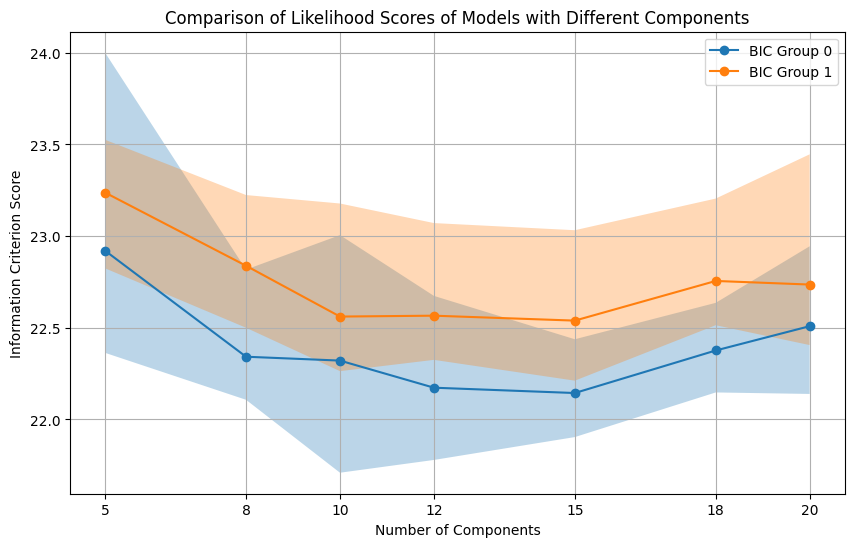

In [285]:
results = DyslexiaDat2.models_pipeline(13, [5,8,10,12,15,18,20], group=[0,1], starting_tests=10, only_starting=True, only_bic=True, covariance_type='tied')

In [340]:
# split the subjects into two groups
tot_subj = DyslexiaDat2.subjects
np.random.seed(42)
train_participants, test_participants = train_test_split(tot_subj, test_size=0.1, random_state=42)
train_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in train_participants])
test_labels = np.array([WhichCN[np.where(tot_subj == sub)[0][0]] for sub in test_participants])

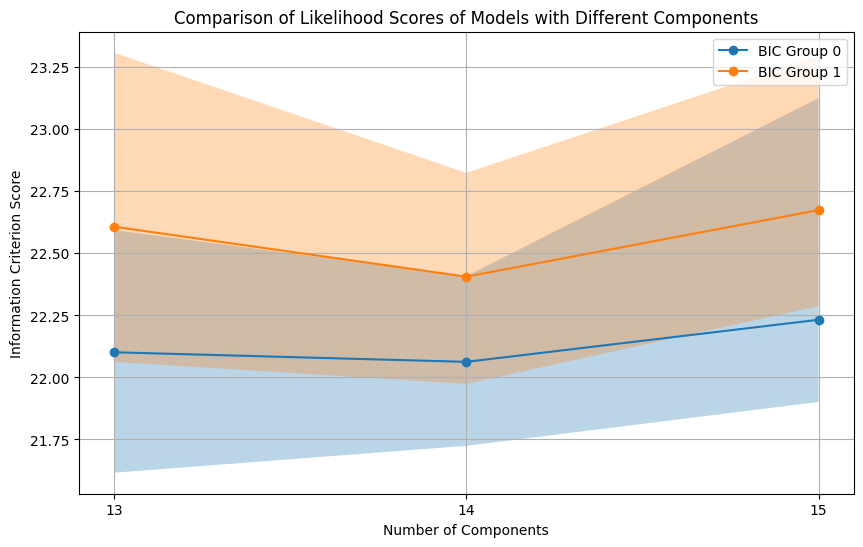

In [347]:
train_model = DyslexiaDat2.models_pipeline(13, [13,14,15], group=[0,1], starting_tests=20, only_starting=True, only_bic=True, covariance_type='tied', remove_subj=test_participants)

In [420]:
train_model

[[[[GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),
    GaussianHMM(covariance_type='tied', n_components=15)],
   [GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),
    GaussianHMM(covariance_type='tied', n_components=15)],
   [GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),
    GaussianHMM(covariance_type='tied', n_components=15)]],
  None],
 [[[GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),
    GaussianHMM(covariance_type='tied', n_components=15)],
   [GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),
    GaussianHMM(covariance_type='tied', n_components=15)],
   [GaussianHMM(covariance_type='tied', n_components=13),
    GaussianHMM(covariance_type='tied', n_components=14),

In [365]:
# Extract the model for group 0 (14 components)
from copy import deepcopy

model_g0 = deepcopy(train_model[0][0][1][1])
model_g1 = deepcopy(train_model[1][0][1][1])

In [416]:
accuracy = []
conf_matrix = np.zeros((2, 2))
for idx,subj in enumerate(test_participants):
    # get the group of the subject
    g = test_labels[idx]
    s = np.where(tot_subj == subj)[0][0]

    X0, Y0, l0 = DyslexiaDat2.get_data(13, subject=int(s))
    res_0 = model_g0.bic(np.column_stack((X0, Y0)),l0)/l0
    res_1 = model_g1.bic(np.column_stack((X0, Y0)),l0)/l0
    if res_0 < res_1 and g == 0:
        accuracy.append(1)
        conf_matrix[0][0] += 1
    elif res_0 < res_1 and g == 1:
        accuracy.append(0)
        conf_matrix[0][1] += 1
    elif res_0 > res_1 and g == 0:
        accuracy.append(0)
        conf_matrix[1][0] += 1
    elif res_0 > res_1 and g == 1:
        accuracy.append(1)
        conf_matrix[1][1] += 1

print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')


Average accuracy: 0.75
Standard deviation: 0.4330127018922193
Total confusion matrix:
[[6. 2.]
 [1. 3.]]


In [472]:
from IPython.utils import io

def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    with io.capture_output() as _:
        train_model = self.models_pipeline(stimuli, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
    model_g0 = deepcopy(train_model[0][0][0])
    model_g1 = deepcopy(train_model[1][0][0])
    return model_g0, model_g1

In [478]:
def evaluation(self, model_g0, model_g1, test_participants, test_labels, conf_matrix):
    accuracy = []
    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]

        X0, Y0, l0 = self.get_data(13, subject=int(s))
        res_0 = model_g0.bic(np.column_stack((X0, Y0)),l0)/l0
        res_1 = model_g1.bic(np.column_stack((X0, Y0)),l0)/l0
        if res_0 < res_1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif res_0 < res_1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif res_0 > res_1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif res_0 > res_1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
    return accuracy, conf_matrix

In [480]:
accuracy = []
conf_matrix = np.zeros((2, 2))
for i in range(5):
    train_participants, test_participants = train_test_split(DyslexiaDat2.subjects, test_size=0.1, random_state=i)
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    model_g0, model_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], 13, [14], 25, 'tied')
    acc, conf = evaluation(DyslexiaDat2, model_g0, model_g1, test_participants, test_labels, conf_matrix)
    accuracy.append(acc)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.7777777777777778
Fold 2 accuracy: 0.6666666666666666
Fold 3 accuracy: 0.6666666666666666
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 0.5555555555555556
Average accuracy: 0.6888888888888889
Standard deviation: 0.46294814791110356
Total confusion matrix:
[[266. 144.]
 [  8. 140.]]


## HMM multiple stimuli

In [510]:
def train_HMM(self, test_participants, group, stimuli, n_components, starting_tests, covariance_type):
    models_g0 = []
    models_g1 = []
    for stim in stimuli:
        with io.capture_output() as _:
            train_model = self.models_pipeline(stim, n_components, group=group, starting_tests=starting_tests, only_starting=True, only_bic=True, covariance_type=covariance_type, remove_subj=test_participants)
        models_g0.append(deepcopy(train_model[0][0][0]))
        models_g1.append(deepcopy(train_model[1][0][0]))
        
    return models_g0, models_g1

In [514]:
def evaluation(self, stimuli, models_g0, models_g1, test_participants, test_labels, conf_matrix):
    accuracy = []

    for idx,subj in enumerate(test_participants):
        # get the group of the subject
        g = test_labels[idx]
        s = np.where(self.subjects == subj)[0][0]
        vote_g0 = 0
        vote_g1 = 0
        for s_idx,stim in enumerate(stimuli):
            X0, Y0, l0 = self.get_data(stim, subject=int(s))
            res_0 = models_g0[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0
            res_1 = models_g1[s_idx].bic(np.column_stack((X0, Y0)),l0)/l0

            if res_0 < res_1:
                vote_g0 += 1
            else:
                vote_g1 += 1

        if vote_g0 > vote_g1 and g == 0:
            accuracy.append(1)
            conf_matrix[0][0] += 1
        elif vote_g0 > vote_g1 and g == 1:
            accuracy.append(0)
            conf_matrix[0][1] += 1
        elif vote_g0 < vote_g1 and g == 0:
            accuracy.append(0)
            conf_matrix[1][0] += 1
        elif vote_g0 < vote_g1 and g == 1:
            accuracy.append(1)
            conf_matrix[1][1] += 1
        
    return accuracy, conf_matrix

In [515]:
accuracy = []
conf_matrix = np.zeros((2, 2))
stimuli = [3, 13, 25]
for i in range(5):
    train_participants, test_participants = train_test_split(DyslexiaDat2.subjects, test_size=0.1, random_state=i)
    train_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in train_participants])
    test_labels = np.array([WhichCN[np.where(DyslexiaDat2.subjects == sub)[0][0]] for sub in test_participants])
    models_g0, models_g1 = train_HMM(DyslexiaDat2, test_participants, [0,1], stimuli, [14], 25, 'tied')
    acc, conf = evaluation(DyslexiaDat2, stimuli, models_g0, models_g1, test_participants, test_labels, conf_matrix)
    accuracy.append(acc)
    conf_matrix += conf
    print(f'Fold {i+1} accuracy: {np.mean(acc)}')
    
print(f'Average accuracy: {np.mean(accuracy)}')
print(f'Standard deviation: {np.std(accuracy)}')
print(f'Total confusion matrix:\n{conf_matrix}')

Fold 1 accuracy: 0.8888888888888888
Fold 2 accuracy: 0.7777777777777778
Fold 3 accuracy: 0.8888888888888888
Fold 4 accuracy: 0.7777777777777778
Fold 5 accuracy: 0.6666666666666666
Average accuracy: 0.8
Standard deviation: 0.4
Total confusion matrix:
[[218.  30.]
 [ 56. 254.]]
